In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the data from database
file_path = './Resources/clean_beer.csv'
beer_df = pd.read_csv(file_path)
beer_df.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style,beer_abv
0,4.0,4.0,3.5,4.0,4.0,Rauchbier,7.4
1,3.5,3.5,3.5,3.5,3.5,American IPA,6.1
2,1.0,3.0,3.0,1.5,1.5,Euro Pale Lager,5.0
3,2.5,3.0,4.0,4.0,3.5,Witbier,4.8
4,3.5,4.0,4.0,3.5,3.5,American Porter,6.0


In [3]:
beer_style_count = beer_df.beer_style.value_counts()
beer_style_count

American IPA                      341
American Double / Imperial IPA    226
American Pale Ale (APA)           200
Saison / Farmhouse Ale            166
American Porter                   156
                                 ... 
American Malt Liquor                3
Gose                                2
Kvass                               2
Japanese Rice Lager                 2
Faro                                1
Name: beer_style, Length: 103, dtype: int64

<AxesSubplot:ylabel='Density'>

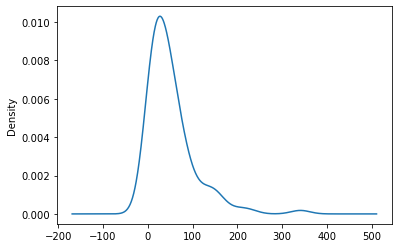

In [4]:
beer_style_count.plot.density()

In [5]:
replace_beer = list(beer_style_count[beer_style_count < 100].index)
for beer in replace_beer:
    beer_df.beer_style = beer_df.beer_style.replace(beer,"Other")
    
# Check to make sure binning was successful
beer_df.beer_style.value_counts()

Other                               3206
American IPA                         341
American Double / Imperial IPA       226
American Pale Ale (APA)              200
Saison / Farmhouse Ale               166
American Porter                      156
American Amber / Red Ale             151
Belgian Strong Dark Ale              151
Russian Imperial Stout               142
Belgian Strong Pale Ale              132
American Double / Imperial Stout     131
Tripel                               126
Fruit / Vegetable Beer               113
American Barleywine                  105
Name: beer_style, dtype: int64

In [6]:
beer_df = beer_df.loc[beer_df['beer_style'] != 'Other']
beer_df.beer_style.value_counts()

American IPA                        341
American Double / Imperial IPA      226
American Pale Ale (APA)             200
Saison / Farmhouse Ale              166
American Porter                     156
American Amber / Red Ale            151
Belgian Strong Dark Ale             151
Russian Imperial Stout              142
Belgian Strong Pale Ale             132
American Double / Imperial Stout    131
Tripel                              126
Fruit / Vegetable Beer              113
American Barleywine                 105
Name: beer_style, dtype: int64

In [7]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
beer_cat = beer_df.dtypes[beer_df.dtypes == "object"].index.tolist()
beer_cat

['beer_style']

In [9]:
beer_df.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style,beer_abv
1,3.5,3.5,3.5,3.5,3.5,American IPA,6.1
4,3.5,4.0,4.0,3.5,3.5,American Porter,6.0
5,4.0,4.0,3.5,4.0,4.0,Tripel,10.0
7,4.0,4.0,4.0,3.5,3.5,American IPA,5.8
12,4.0,3.5,3.5,4.0,3.5,Belgian Strong Pale Ale,10.5


In [10]:
enc = OneHotEncoder(sparse=False)

encode_df = pd.DataFrame(enc.fit_transform(beer_df[beer_cat]))
                         
encode_df.columns = enc.get_feature_names(beer_cat)
encode_df.head()

,beer_style_American Amber / Red Ale,beer_style_American Barleywine,beer_style_American Double / Imperial IPA,beer_style_American Double / Imperial Stout,beer_style_American IPA,beer_style_American Pale Ale (APA),beer_style_American Porter,beer_style_Belgian Strong Dark Ale,beer_style_Belgian Strong Pale Ale,beer_style_Fruit / Vegetable Beer,beer_style_Russian Imperial Stout,beer_style_Saison / Farmhouse Ale,beer_style_Tripel
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
merge_df = beer_df.merge(encode_df, left_index=True, right_index=True).drop(beer_cat, 1)
merge_df.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style_American Amber / Red Ale,beer_style_American Barleywine,beer_style_American Double / Imperial IPA,beer_style_American Double / Imperial Stout,beer_style_American IPA,beer_style_American Pale Ale (APA),beer_style_American Porter,beer_style_Belgian Strong Dark Ale,beer_style_Belgian Strong Pale Ale,beer_style_Fruit / Vegetable Beer,beer_style_Russian Imperial Stout,beer_style_Saison / Farmhouse Ale,beer_style_Tripel
1,3.5,3.5,3.5,3.5,3.5,6.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.5,4.0,4.0,3.5,3.5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,4.0,4.0,3.5,4.0,4.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,4.0,4.0,3.5,3.5,5.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4.0,3.5,3.5,4.0,3.5,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
merge_df.dtypes

review_overall                                 float64
review_aroma                                   float64
review_appearance                              float64
review_palate                                  float64
review_taste                                   float64
beer_abv                                       float64
beer_style_American Amber / Red Ale            float64
beer_style_American Barleywine                 float64
beer_style_American Double / Imperial IPA      float64
beer_style_American Double / Imperial Stout    float64
beer_style_American IPA                        float64
beer_style_American Pale Ale (APA)             float64
beer_style_American Porter                     float64
beer_style_Belgian Strong Dark Ale             float64
beer_style_Belgian Strong Pale Ale             float64
beer_style_Fruit / Vegetable Beer              float64
beer_style_Russian Imperial Stout              float64
beer_style_Saison / Farmhouse Ale              float64
beer_style

In [13]:
# Create features
X = merge_df.drop(['review_overall'], axis = 1).values
# Create target
y = merge_df['review_overall'].values

In [14]:
print(y)

[3.5 3.5 4.  4.  4.  4.  4.  4.  4.5 3.5 3.5 4.5 4.  5.  4.  4.  4.  2.5
 2.5 3.  3.5 1.5 3.5 4.  3.  4.  3.5 4.  3.  3.5 3.5 2.5 4.5 3.5 3.5 3.5
 4.  4.  3.5 4.  4.  4.5 4.5 4.  4.  3.5 4.5 4.  4.  4.  4.5 4.  4.5 4.5
 4.  4.  2.5 3.5 4.  2.5 3.  2.5 3.5 4.  2.  4.  4.  3.  4.  4.  4.  4.
 3.5 2.5 4.5 4.  4.  4.  4.  3.5 3.  4.5 4.5 3.  4.  4.5 3.  3.  4.  4.
 4.  4.  3.5 4.  3.5 2.  2.  3.5 4.  3.  4.  4.5 4.  4.  3.5 4.  4.  4.
 3.5 4.5 4.  4.5 4.  4.  3.5 4.  4.  4.  3.  4.  3.  2.5 3.5 4.  4.  4.
 3.5 3.5 4.  4.  4.  4.  3.5 4.  3.  3.5 4.  4.  4.  4.  3.5 3.5 4.  4.
 4.5 4.  4.  4.  3.5 4.  3.5 4.  4.  4.  3.5 3.5 3.5 3.  4.  4.  3.5 4.
 4.  4.  4.  4.  4.  3.5 4.  3.  2.5 4.  4.  4.  4.  4.5 4.  4.  4.  3.5
 3.5 4.  4.  4.  4.  4.  3.5 4.  4.5 4.  4.5 4.5 4.5 3.5 4.  4.  3.5 4.5
 4.  4.  3.5 4.  3.5 3.5 4.5 3.5 4.  4.  3.5 3.  4.  4.  4.  4.  4.  4.
 4.  3.5 4.  4.  4.5 3.5 4.  4.  3.5 3.5 4.5 4.  3.5 4.  4.  4.5 4.5 3.5
 4.  4.5 4.5 4.  4.5 3.5 5.  4.5 3.5 4.  4.  3.5 4.  3.5 2

In [15]:
# Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_inupt_features = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 20
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                             input_dim=number_inupt_features, activation='relu'))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                            activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,
                            activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["MSE"])

In [27]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 544us/step - loss: -1.5140 - MSE: 10.0553
Epoch 2/100
21/21 [==============================] - 0s 597us/step - loss: -4.4658 - MSE: 9.0843
Epoch 3/100
21/21 [==============================] - 0s 499us/step - loss: -7.8775 - MSE: 8.4771
Epoch 4/100
21/21 [==============================] - 0s 449us/step - loss: -12.2876 - MSE: 8.1721
Epoch 5/100
21/21 [==============================] - 0s 499us/step - loss: -18.2747 - MSE: 8.0530
Epoch 6/100
21/21 [==============================] - 0s 549us/step - loss: -26.4421 - MSE: 8.0182
Epoch 7/100
21/21 [==============================] - 0s 449us/step - loss: -37.3935 - MSE: 8.0118
Epoch 8/100
21/21 [==============================] - 0s 499us/step - loss: -51.8173 - MSE: 8.0110
Epoch 9/100
21/21 [==============================] - 0s 600us/step - loss: -70.1157 - MSE: 8.0109
Epoch 10/100
21/21 [==============================] - 0s 547us/step - loss: -92.9672 - MSE: 8.0109
Epoch 11/100
21/21 [=

21/21 [==============================] - 0s 648us/step - loss: -51061.2617 - MSE: 8.0109
Epoch 83/100
21/21 [==============================] - 0s 499us/step - loss: -52841.2188 - MSE: 8.0109
Epoch 84/100
21/21 [==============================] - 0s 499us/step - loss: -54642.0234 - MSE: 8.0109
Epoch 85/100
21/21 [==============================] - 0s 692us/step - loss: -56481.6328 - MSE: 8.0109
Epoch 86/100
21/21 [==============================] - 0s 499us/step - loss: -58362.5273 - MSE: 8.0109
Epoch 87/100
21/21 [==============================] - 0s 529us/step - loss: -60267.7578 - MSE: 8.0109
Epoch 88/100
21/21 [==============================] - 0s 648us/step - loss: -62235.5391 - MSE: 8.0109
Epoch 89/100
21/21 [==============================] - 0s 449us/step - loss: -64201.7891 - MSE: 8.0109
Epoch 90/100
21/21 [==============================] - 0s 598us/step - loss: -66234.7422 - MSE: 8.0109
Epoch 91/100
21/21 [==============================] - 0s 549us/step - loss: -68294.1484 - MSE: 

In [20]:
X_train_scaled

array([[ 0.56049546,  0.60875437, -0.22440424, ..., -0.2459869 ,
        -0.30593473, -0.23551542],
       [ 0.56049546,  0.60875437, -0.22440424, ...,  4.06525716,
        -0.30593473, -0.23551542],
       [ 0.56049546, -0.77026063, -0.22440424, ..., -0.2459869 ,
        -0.30593473, -0.23551542],
       ...,
       [ 1.69167719,  0.60875437,  0.78541485, ..., -0.2459869 ,
        -0.30593473, -0.23551542],
       [ 0.56049546,  1.98776936,  1.79523395, ..., -0.2459869 ,
        -0.30593473, -0.23551542],
       [-0.57068628,  0.60875437,  0.78541485, ..., -0.2459869 ,
        -0.30593473, -0.23551542]])

In [28]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: -8.9408e+04 - MSE: 7.9731
Loss: -89408.15625, Accuracy: 7.9730939865112305
